# Requirements


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install konlpy
!pip install nltk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# Load File

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
df_travel = pd.read_csv("/content/drive/Shareddrives/2021 여름방학 프로젝트/데이터/블로그 크롤링/여행_blog_crawling.csv")
print(df_travel.head())

# df=pd.concat([df_travel,df_watch,df_festival], ignore_index=True)
# print(df.shape)
df=df_travel

   Unnamed: 0                                         title  \
0           0  [아이와 싱가포르여행] Prologue (2020.1.9 ~ 2020.1.14)   
1           1                                 코타키나발루 여행 첫째날   
2           2                             중국 계림 여행의 알짜 장소들!   
3           3                   06. 칸쿤신혼여행 (여행산책 지인할인 및 견적)   
4           4                             지금은 베트남 다낭 여행 중!    

                 date                                           maintext  
0  2020. 1. 16. 13:41  계획대로라면 작년 9월에 다녀왔어야 하는 싱가폴인데\n여행을 일주일쯤 남겨두고 심각...  
1   2020. 1. 2. 21:47  아언니는 코타키나발루 여행 중 :)\n오랜만에 해외여행 일기예요.\n1월 1일 새해...  
2  2020. 1. 17. 16:35  얼마 전 중국 계림 여행을 다녀 왔었는데요\n계획을 잘 짜고 가서 그런지 모든 곳들...  
3  2020. 1. 13. 18:40  여행산책 지인할인, 지인소개할인 \n칸쿤신혼여행안녕하세요 블로거 박디니입니다 :-)...  
4   2020. 1. 12. 2:47  안녕하세요, 여행블로거 깜썰입니다 :)\n이웃님들 주말 잘 보내고 계신가요 - 저는...  


In [4]:
# 월별 기간설정없이2020.01~2020.12 모든 데이터로 테스트
df_text = df.loc[:,['maintext']]
print(df_text)
text=''
for temp in df_text['maintext']:
  text+=temp

print(text)



                                              maintext
0    계획대로라면 작년 9월에 다녀왔어야 하는 싱가폴인데\n여행을 일주일쯤 남겨두고 심각...
1    아언니는 코타키나발루 여행 중 :)\n오랜만에 해외여행 일기예요.\n1월 1일 새해...
2    얼마 전 중국 계림 여행을 다녀 왔었는데요\n계획을 잘 짜고 가서 그런지 모든 곳들...
3    여행산책 지인할인, 지인소개할인 \n칸쿤신혼여행안녕하세요 블로거 박디니입니다 :-)...
4    안녕하세요, 여행블로거 깜썰입니다 :)\n이웃님들 주말 잘 보내고 계신가요 - 저는...
..                                                 ...
327  거제도 비대면 여행\n일몰 일출명소로 떠나는\n거제 드라이브코스글,사진 / 와그잡\...
328  대구 근교 글램핑 합천 H 글램핑에서 은하수보며 무한리필바베큐로 멋진 하루를 보냈었...
329  지난번에 나트랑 빈펄리조트에 대해서 포스팅을 남겨보았는데요. 오늘은 조금 더 자세하...
330  울릉도 배편 전 후포여객선터미널 이용했어요. 제이에이치페리에서 운영하는 씨플라워호 ...
331  지난주말 친정에 갔다 울산오는길\n부산에 들러서 해운대빛축제 구경하고왔어요\n지난 ...

[332 rows x 1 columns]
계획대로라면 작년 9월에 다녀왔어야 하는 싱가폴인데
여행을 일주일쯤 남겨두고 심각한 헤이즈 때문에 전격 취소ㅜ
올해 1월로 날짜 변경해두고는 그날이 오기는 오는건가 그랬는데
 어느새 시간이 이렇게나 흘러 꿈같은 4박 6일을 보내고 돌아왔다.
항공권 최초 예약했던 게 작년 1월이니
그 때부터 따지면 무려 1년만에 다녀온 여행이었다.
여행 앞두고는 복딩이 아플까봐 노심초사.
12월 중순까지 아프다 말다 반복하는 복딩이 보면서
이 여행을 과연 갈 수 있는건가 걱정이 태산이었는데
한약빨이 잘 받은건지 아프긴 커녕 넘치는 에너지를 감당 못할 지경이었다며;;
여행하는 동

# 불용어 리스트 불러오기

In [5]:
df_stop_word = pd.read_csv('/content/drive/Shareddrives/2021 여름방학 프로젝트/데이터/블로그 크롤링/stop_word_v2.csv', encoding='utf-8-sig')
df_stop_word = df_stop_word['stop_word']
stop_word_list = df_stop_word.values.tolist()
print(stop_word_list)

['가', '가까스로', '가령', '가서', '가지', '각', '각각', '각자', '각종', '갖고말하자면', '같', '같다', '같은', '같이', '개', '개의치않고', '거니와', '거바', '거의', '것', '것과', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에', '결과에 이르다', '결국', '결론을', '결론을 낼 수 있다', '겸사겸사', '경우', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가', '관계가 있다', '관계없이', '관련이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그것', '그녀', '그들', '그때', '그래', '그래도', '그래서', '그러', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도', '그럼에도 불구하고', '그렇', '그렇게', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에', '그에 따르는', '그위에', '그저', '그중에서', '그치지', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '김에', '까닭에', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '나오', '남들', '남짓', '낫다', '내', '낼', '너', '너희', '너희들', '네', '넷', '년', '년도', '논하지', '논하지 않다', '놀라다', '놓', '누가', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로',

# 형태소 분석 및 불용어 제거

In [6]:
from konlpy.tag import Okt
from nltk import Text,tokenize
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from collections import Counter

# 트위터에서 만든 소셜 분석을 위한 형태소 분석기 Okt 사용
okt = Okt()
words = okt.nouns(text)
# print(noun)

clean_words = [] 
for word in words: 
    if word not in stop_word_list: #불용어 제거
        clean_words.append(word)
print(clean_words) 
print(len(clean_words))

noun_list = Counter(clean_words)
print(noun_list)
print(noun_list.most_common(100))


['계획', '라면', '작년', '싱가폴', '여행', '일주일', '헤이즈', '전격', '취소', '올해', '날짜', '변경', '그날', '오기', '건가', '꿈', '박', '항공권', '최초', '예약', '게', '작년', '무려', '여행', '여행', '복딩', '노심초사', '중순', '반복', '복딩', '여행', '건가', '걱정', '태산', '빨', '커녕', '에너지', '감당', '지경', '여행', '복딩이', '건', '모기', '알러지', '복딩이', '모기', '물리', '미션', '클리어', '여행', '해피', '걸', '여행', '시작', '라운지', '작년', '오픈', '싱가포르항공', '실버', '크리스', '라운지', '싱가폴', '공항', '실버', '크리스', '라운지', '꼭', '복딩이', '첫', '비지니스', '데뷔', '엄마', '스물', '비지니스', '처음', '타', '꼬맹이', '비지니스', '비행', '비지니스', '진리', '아빠', '돈', '보기', '최애', '기내식', '아시아나', '쌈밥', '정식', '별로', '라면', '그릇', '호도', '항공', '라면', '걸', '싱가폴', '여행', '첫', '숙소', '토사', '카펠라', '호텔', '트럼프', '김정은', '정상회담', '호텔', '계단', '수영장', '곳', '복딩', '물', '만난', '물고기', '가까이', '수영', '기색', '도', '게', '재정', '비', '호텔', '연결', '팔라완', '비치', '모래', '방학', '내내', '간만', '코', '바람', '애가', '막', '세상', '텐션', '잠', '기절', '뻔', '담날', '아침', '창', '밖', '풍경', '센토', '루지', '고고', '완전', '공감', '스카이라인', '타고', '높이', '건', '긴장', '듯', '루지', '타고', '온', '어린이', '점심', '종', '비치', '클럽', '카펠라',

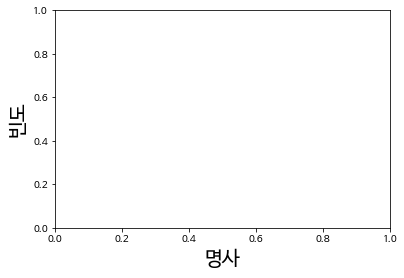

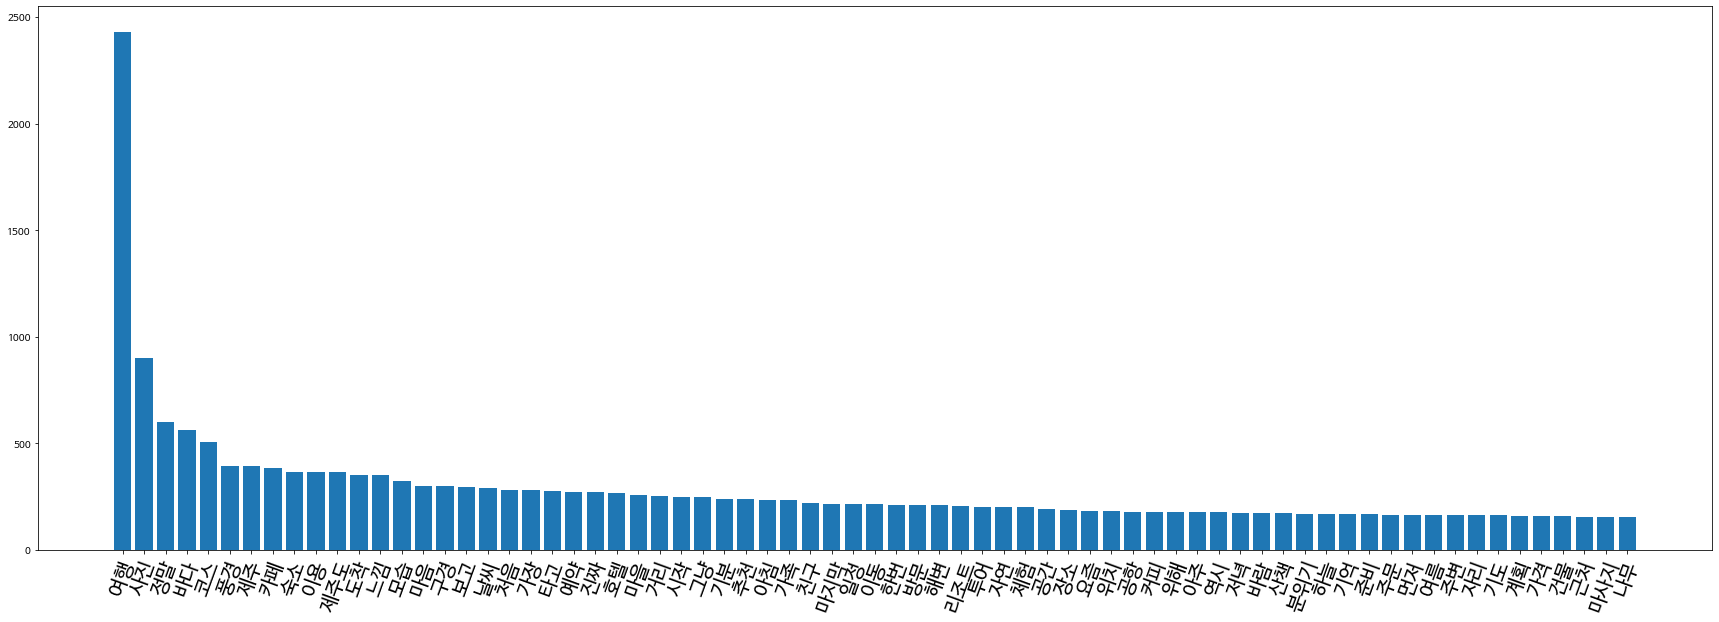

In [7]:
# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
# font_path = "/content/drive/Shareddrives/2021 여름방학 프로젝트/데이터/블로그 크롤링/MALGUN.TTF"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# plt.rc('font', family=font_name) 
plt.rc('font', family='NanumBarunGothic') 

# 그래프에서 x, y 값을 설정
wordInfo = dict()

for tags, counts in noun_list.most_common(100):
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts

values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

# 그래프 x, y 라벨 설정
plt.xlabel("명사",fontsize=20)
plt.ylabel("빈도",fontsize=20)
plt.figure(figsize=(30,10))
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70',fontsize=20)
plt.show()


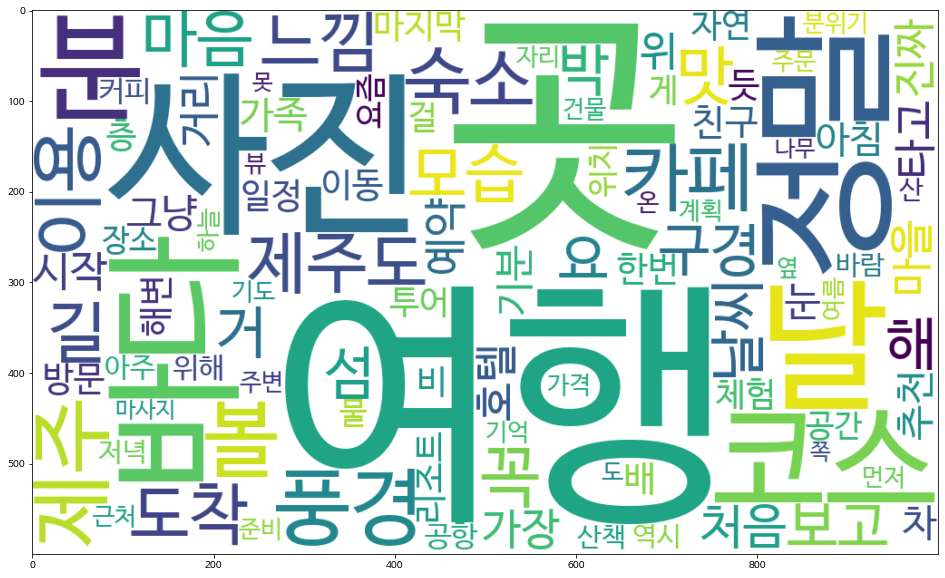

In [9]:
#워드클라우드 라이브러리 불러오기

from wordcloud import WordCloud
import platform


wc = WordCloud(width=1000, height=600, background_color="white", font_path='NanumBarunGothic', max_words=100)
wc = wc.generate_from_frequencies(noun_list)

plt.figure(figsize=(30,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis=('off')
plt.show()